# Indirect Shooting Trajectory Optimisation
Within this method, one must find the appropriate initial costate variables in order to propel the dynamical system optimally to its target through Pontryagin's maxmimum principle.

In [1]:
# We start be acquiring our resources
import sys
sys.path.append('../')
from Trajectory import Point_Lander 
from Optimisation import Indirect_Shooting
from PyGMO import *
from numpy import *
import matplotlib.pyplot as plt

In [2]:
# We instantiate a dynamical model
model = Point_Lander()
# and the optimisation problem
prob  = Indirect_Shooting(model)
# we then convert the constrainted problem to box bounded
#prob  = problem.con2uncon(prob, 'feasibility')

In [3]:
# Self-adaptive differential evolution
algo1 = algorithm.jde(50, screen_output=True)
algo2 = algorithm.scipy_slsqp(max_iter=2000, screen_output=True)
algo3 = algorithm.mbh(algo2, screen_output=True)

In [4]:
pop = population(prob, 10)

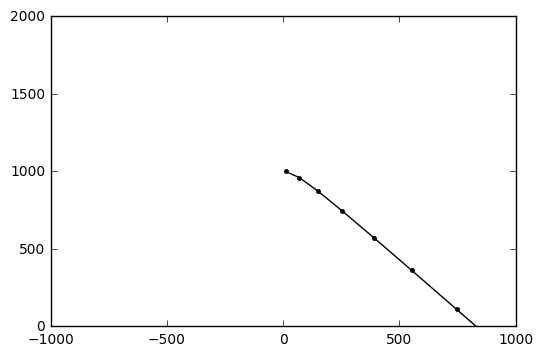

In [5]:
z   = array(pop.champion.x)
tf  = z[-1]
li  = z[:-1]
fsi = hstack((model.si, li))
t, s, c = model.Propagate.Indirect(fsi, tf, 50)
plt.plot(s[:,0], s[:,1], 'k.-')
plt.xlim((model.slb[0], model.sub[0]))
plt.ylim((model.slb[1], model.sub[1]))
plt.show()

In [ ]:
pop = algo3.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1     8     1.000000E+00     0.000000E+00
    2    26     1.000000E+00     0.000000E+00
    3    34     1.000000E+00     0.000000E+00
    4    52     1.000000E+00     0.000000E+00


In [ ]:
z   = array(pop.champion.x)
tf  = z[-1]
li  = z[:-1]
fsi = hstack((model.si, li))
t, s, c = model.Propagate.Indirect(fsi, tf, 50)
plt.plot(s[:,0], s[:,1], 'k.-')
plt.xlim((model.slb[0], model.sub[0]))
plt.ylim((model.slb[1], model.sub[1]))
plt.show()

In [ ]:
plt.xlim((model.slb[0], model.sub[0]))
plt.ylim((model.slb[1], model.sub[1]))
for i in range(10):
    pop = algo1.evolve(pop)
    z   = array(pop.champion.x)
    tf  = z[-1]
    li  = z[:-1]
    fsi = hstack((model.si, li))
    t, s, c = model.Propagate.Indirect(fsi, tf, 50)
    plt.plot(s[:,0], s[:,1], 'k.-')
plt.show()

In [ ]:
plt.xlim((model.slb[0], model.sub[0]))
plt.ylim((model.slb[1], model.sub[1]))
for i in range(100):
    pop = algo1.evolve(pop)
    z   = array(pop.champion.x)
    tf  = z[-1]
    li  = z[:-1]
    fsi = hstack((model.si, li))
    t, s, c = model.Propagate.Indirect(fsi, tf, 50)
    plt.plot(s[:,0], s[:,1])
plt.show()